In [1]:
import numpy as np
import pandas as pd
import os
import pickle
from math import sqrt

In [18]:
# root_dir = '/home/dhasade/audits/ml-audits/data/folktables'
# protected_attributes = ["SEX", "MAR", "AGEP", "NATIVITY", "MIG"]

root_dir = '/home/dhasade/audits/ml-audits/data/german_credit'
protected_attributes = ['age', 'sex', 'marital_status', 'own_telephone', 'employment']

In [19]:
# read all_ys pickle
with open(os.path.join(root_dir, 'all_ys.pkl'), 'rb') as f:
    all_ys = pickle.load(f)

In [19]:
for k in range(5):
    p_y_given_0 = all_ys[k][0][''][''][0]
    p_y_given_1 = all_ys[k][0][''][''][1]

    print(f"{protected_attributes[k]}:")
    print(f"p(y=1|attr=1) = {p_y_given_1}")
    print(f"p(y=1|attr=0) = {p_y_given_0}")
    
    # compute sigma_attr0 and sigma_attr1
    sigma_attr1 = sqrt(p_y_given_1 * (1 - p_y_given_1))
    sigma_attr0 = sqrt(p_y_given_0 * (1 - p_y_given_0))
    print(f"sigma_attr1 = {sigma_attr1}")
    print(f"sigma_attr0 = {sigma_attr0}")
    

age:
p(y=1|attr=1) = 0.7283950617283951
p(y=1|attr=0) = 0.5789473684210527
sigma_attr1 = 0.44478724776918077
sigma_attr0 = 0.49372797471825575
sex:
p(y=1|attr=1) = 0.7231884057971014
p(y=1|attr=0) = 0.6483870967741936
sigma_attr1 = 0.44742254694834993
sigma_attr0 = 0.47747384170331897
marital_status:
p(y=1|attr=1) = 0.6592920353982301
p(y=1|attr=0) = 0.7335766423357665
sigma_attr1 = 0.4739473045167458
sigma_attr0 = 0.4420881723764496
own_telephone:
p(y=1|attr=1) = 0.7202970297029703
p(y=1|attr=0) = 0.6862416107382551
sigma_attr1 = 0.4488532262377632
sigma_attr0 = 0.4640194634168057
employment:
p(y=1|attr=1) = 0.7587822014051522
p(y=1|attr=0) = 0.6561954624781849
sigma_attr1 = 0.4278221268657142
sigma_attr0 = 0.47497681785664647


## Code for getting N_k

In [20]:
# read all_nks pickle
with open(os.path.join(root_dir, 'all_nks.pkl'), 'rb') as f:
    all_nks = pickle.load(f)

# read all_ys pickle
with open(os.path.join(root_dir, 'all_ys.pkl'), 'rb') as f:
    all_ys = pickle.load(f)

In [21]:
db = all_nks[0][4]['1234']
db_y = all_ys[0][4]['1234']

In [22]:
vs = []
for i, k in enumerate(db.keys()):
    if i == 0:
        # print header
        print("attribute_values,N_k,P_y_given_Sk")
    print(f"0{k},{db[k][0]},{db_y[k][0]:.4f}")
    print(f"1{k},{db[k][1]},{db_y[k][1]:.4f}")
    
    vs.append(db[k][0])
    vs.append(db[k][1])

attribute_values,N_k,P_y_given_Sk
00000,0,nan
10000,0,nan
00001,0,nan
10001,0,nan
00010,0,nan
10010,0,nan
00011,0,nan
10011,0,nan
00100,61,0.4590
10100,88,0.6818
00101,18,0.8333
10101,35,0.7143
00110,20,0.5000
10110,47,0.6383
00111,6,0.8333
10111,35,0.8000
01000,29,0.6897
11000,125,0.7280
01001,12,0.5000
11001,141,0.7447
01010,8,0.5000
11010,97,0.7010
01011,7,0.5714
11011,129,0.8062
01100,19,0.7368
11100,44,0.6136
01101,6,0.5000
11101,18,0.8333
01110,4,0.2500
11110,31,0.7419
01111,0,nan
11111,20,0.7000


In [7]:
sum(vs)

5916565

In [2]:
pb_raw_path = '/home/dhasade/audits/ml-audits/data/propublica/propublica_raw.csv'
df = pd.read_csv(pb_raw_path)

In [3]:
df['Number_of_Priors'].mean()

3.2464355152300715

(array([4.361e+03, 9.580e+02, 4.370e+02, 2.040e+02, 7.700e+01, 7.900e+01,
        3.500e+01, 1.400e+01, 4.000e+00, 3.000e+00]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <BarContainer object of 10 artists>)

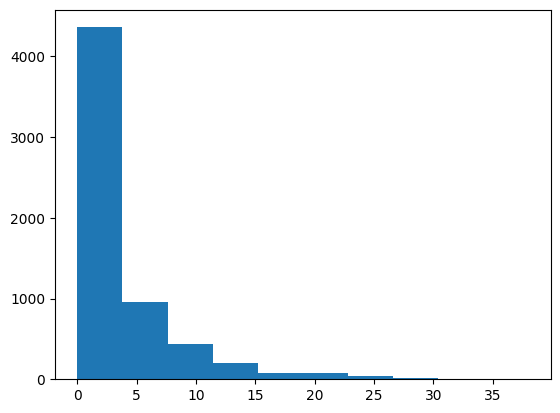

In [5]:
# Plot histogram of number of priors
import matplotlib.pyplot as plt
plt.hist(df['Number_of_Priors'])